# Iris

We are given a dataset in which are registered flowers and their caracteristics.
We have to classify the said flowers in different groups thanks to machine learning.

# Summary

* Sepal length, width and species correlation
* Petal length, width and species correlation
* Global correlation box


Classification:
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

Clustering:
* KMeans
* DBScan
* Agglomerative Clustering

# Library used

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning Library
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Clustering
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from warnings import filterwarnings
filterwarnings('ignore')

# Data

In [3]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Missing values

In [3]:
(data.isnull().sum()/data.shape[0])*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

The dataset is filled, we can use it safely with no need of cleaning.

In [4]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

There are 50 flowers of each species in the dataset.

# Pairplots

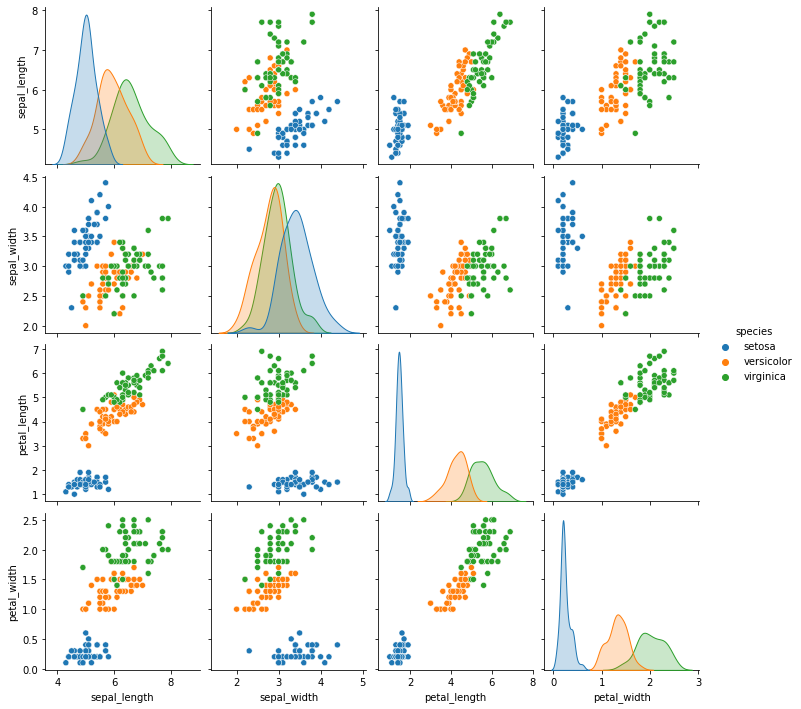

In [5]:
sns.pairplot(data, hue="species")
plt.show()

We can see a big correlation between petal length and petal width. 
We also clearly see clusters on graph showing correlation between petal length and :
- sepal width,
- sepal length.
We also see clusters on graph showing correlation between petal width and :
- sepal width,
- sepal length.

# Correlation box

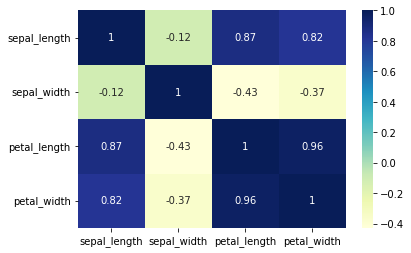

In [6]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

With this correlation box, we can see a big correlation between petals and sepals length, but not so much between sepal width and the rest.

# Classification

### Preparing training data

In [7]:
# Flowers characteristics columns
X = data.iloc[:,:-1]
# Species column
y = data.iloc[:,-1]
# y = data['species']
print('Flowers characteristics columns:\n\n', X.head(), '\n')
print('Species column:\n\n', y.head())

Flowers characteristics columns:

    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

Species column:

 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


The species column is the target. 

With machine learning, we want to guess a given flower's species with its characteristics.

### Spliting the dataset

In [8]:
'''
70 percent of the dataset is used for the training
30 percent is used for test
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

#### Model training

In [9]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

#### Model testing

In [10]:
predictions = LR.predict(X_test)
print("Predictions:\n\n", predictions, '\n')
print("Real values:\n\n", y_test)

Predictions:

 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa'] 

Real values:

 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virgi

#### Model evaluation

In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



The classification report shows how well the logistic regression model did guessing the flowers' species.

##### Accuracy score

In [12]:
print("Accuracy score:", round((accuracy_score(y_test, predictions)*100), 2), '%\n')
print("Accuracy score using cross validation:", 
      round((cross_val_score(LR, X_train, y_train, cv=3, scoring='accuracy').mean())*100, 2), '%\n')

Accuracy score: 100.0 %

Accuracy score using cross validation: 96.19 %



The logistic regression model has an accuracy score of 100%, which means it found the right species for every test flower.

## Decision Tree

### Model training

In [13]:
DT = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

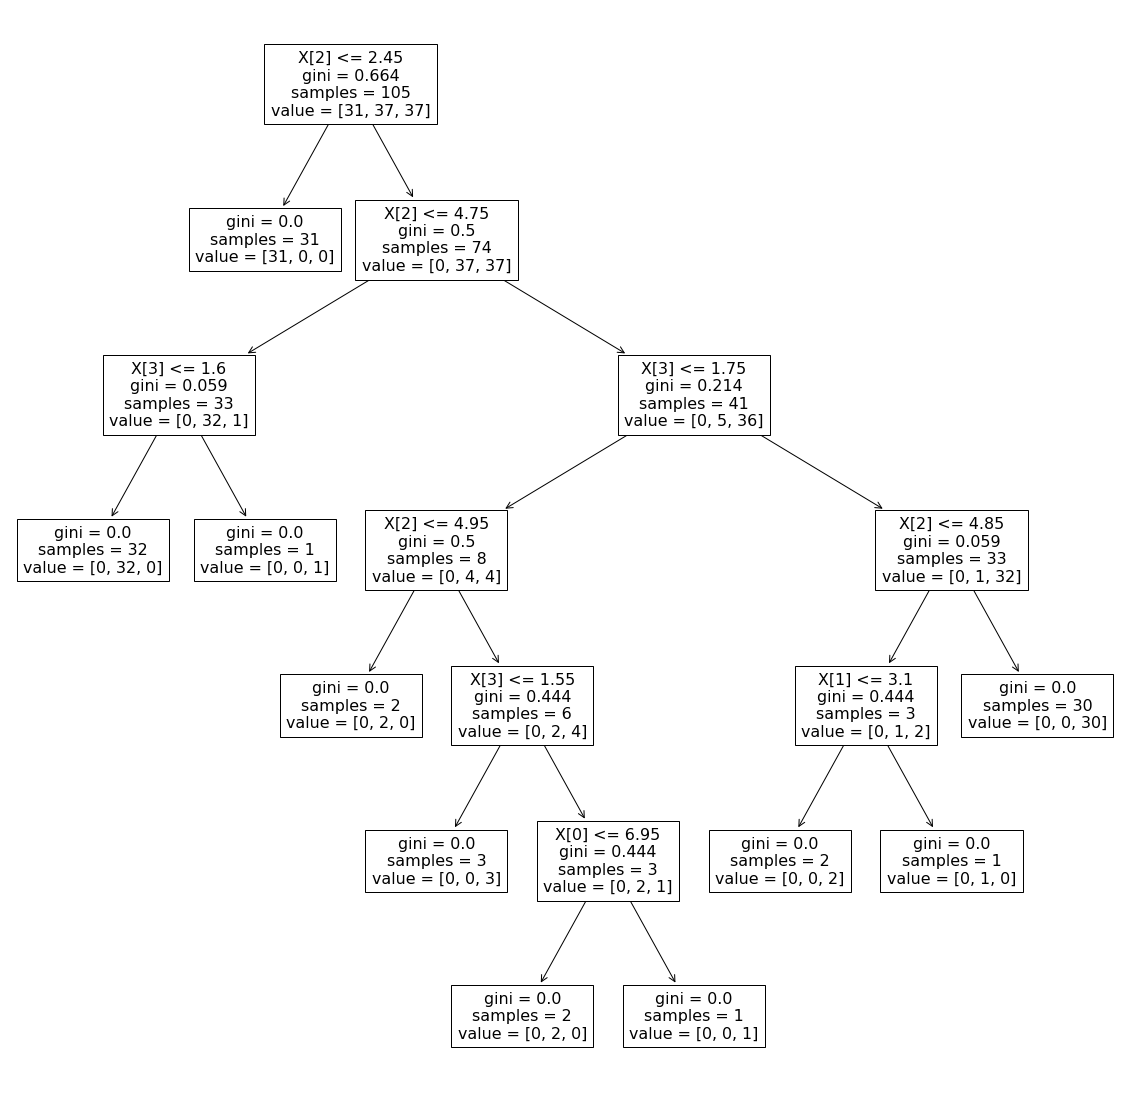

In [14]:
plt.figure(figsize=(20,20))
tree.plot_tree(DT)
plt.show()

### Model testing

In [15]:
predictions = DT.predict(X_test)
print("Predictions:\n\n", predictions, '\n')
print("Real values:\n\n", y_test)

Predictions:

 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa'] 

Real values:

 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virgi

### Model evaluation

In [16]:
print("Classification report:", classification_report(y_test, predictions))

Classification report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##### Accuracy score

In [17]:
print("Accuracy score:", round((accuracy_score(y_test, predictions)*100), 2), '%\n')
print("Accuracy score using cross validation:", 
      round((cross_val_score(DT, X_train, y_train, cv=3, scoring='accuracy').mean())*100, 2), '%\n')

Accuracy score: 100.0 %

Accuracy score using cross validation: 91.43 %



The decision tree has an accuracy score of 100%, which means it found the right species for every test flower.

## Random Forest

In [18]:
RF = RandomForestClassifier()

### Model training

In [19]:
RF.fit(X_train, y_train)

RandomForestClassifier()

### Model testing

In [20]:
predictions = RF.predict(X_test)
print("Predictions:\n\n", predictions, '\n')
print("Real values:\n\n", y_test)

Predictions:

 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa'] 

Real values:

 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virgi

### Model evaluation

In [21]:
print("Classification report:", classification_report(y_test, predictions))

Classification report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##### Accuracy score

In [22]:
print("Accuracy score:", round((accuracy_score(y_test, predictions)*100), 2), '%\n')
print("Accuracy score using cross validation:", 
      round((cross_val_score(RF, X_train, y_train, cv=3, scoring='accuracy').mean())*100, 2), '%\n')

Accuracy score: 100.0 %

Accuracy score using cross validation: 92.38 %



## XGBoost

In [23]:
flower_species_dict = { 'setosa' : 0,
                       'virginica' : 1,
                       'versicolor' : 2
                      }
data_float = data
for i in range(len(data_float)):
    species = data_float['species'][i]
    data_float['species'][i] = flower_species_dict[species]
data_float

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


### DMatrix data format

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

### Model training

In [25]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)

[16:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
bst.dump_model('dump.raw.txt')
f = open('dump.raw.txt', 'r')
print(f.read())

booster[0]:
0:[petal_length<2.45000005] yes=1,no=2,missing=1
	1:leaf=0.419548899
	2:leaf=-0.218360677
booster[1]:
0:[petal_length<4.75] yes=1,no=2,missing=1
	1:[petal_width<1.45000005] yes=3,no=4,missing=3
		3:leaf=-0.216734722
		4:leaf=-0.0620689802
	2:[petal_width<1.75] yes=5,no=6,missing=5
		5:[petal_length<5.05000019] yes=7,no=8,missing=7
			7:leaf=-0.0360000096
			8:leaf=0.179999992
		6:[petal_length<4.85000038] yes=9,no=10,missing=9
			9:leaf=0.128571421
			10:leaf=0.418604642
booster[2]:
0:[petal_length<2.45000005] yes=1,no=2,missing=1
	1:leaf=-0.209774464
	2:[petal_width<1.75] yes=3,no=4,missing=3
		3:[petal_length<4.94999981] yes=5,no=6,missing=5
			5:leaf=0.404698014
			6:leaf=-9.7534878e-09
		4:[petal_length<4.85000038] yes=7,no=8,missing=7
			7:leaf=-7.66345476e-09
			8:leaf=-0.209302351
booster[3]:
0:[petal_length<2.45000005] yes=1,no=2,missing=1
	1:leaf=0.290567815
	2:leaf=-0.195494026
booster[4]:
0:[petal_length<4.75] yes=1,no=2,missing=1
	1:[petal_width<1.45000005] yes=

### Model testing

In [27]:
probs_predictions = bst.predict(dtest)
predictions = np.asarray([np.argmax(line) for line in probs_predictions])
print("Predictions:\n\n", predictions, '\n')
print("Real values:\n\n", y_test)

Predictions:

 [2 0 1 2 2 0 2 1 2 2 1 0 0 0 0 2 1 2 2 1 0 1 0 1 1 1 1 1 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0] 

Real values:

 73     2
18     0
118    1
78     2
76     2
31     0
64     2
141    1
68     2
82     2
110    1
12     0
36     0
9      0
19     0
56     2
104    1
69     2
55     2
132    1
29     0
127    1
26     0
128    1
131    1
145    1
108    1
143    1
45     0
30     0
22     0
15     0
65     2
11     0
42     0
146    1
51     2
27     0
4      0
32     0
142    1
85     2
86     2
16     0
10     0
Name: species, dtype: object


### Model evaluation 

### Saving model

In [28]:
joblib.dump(bst, 'bst_model.pkl', compress=True)

['bst_model.pkl']

# Clustering

In this part, we will make our Clustering Machine Learning find the species themselves.
We will remove the species column and our models will use KMeans, DBScan and  

In [4]:
clustering_data = data.copy()
clustering_data.pop('species')
X = StandardScaler().fit_transform(clustering_data)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Finding the number of clusters

### Elbow Method

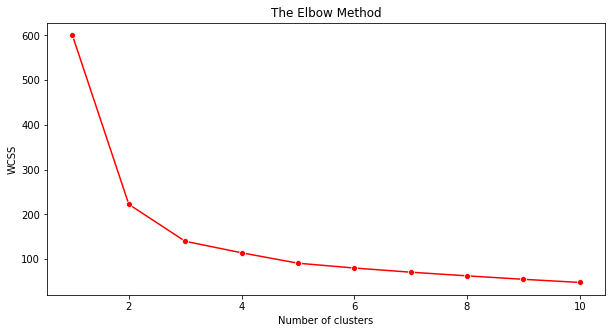

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the elbow method, we found that the number of clusters is around 3.

### Silhouette Plot

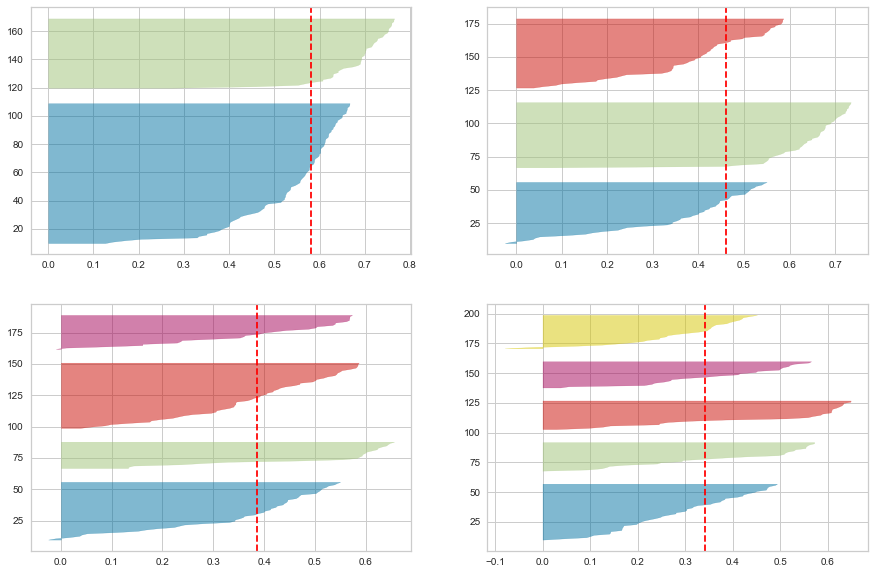

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
fig.show()

## KMeans

### Model Fitting

In [6]:
k = 3
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Clusters Visualisation

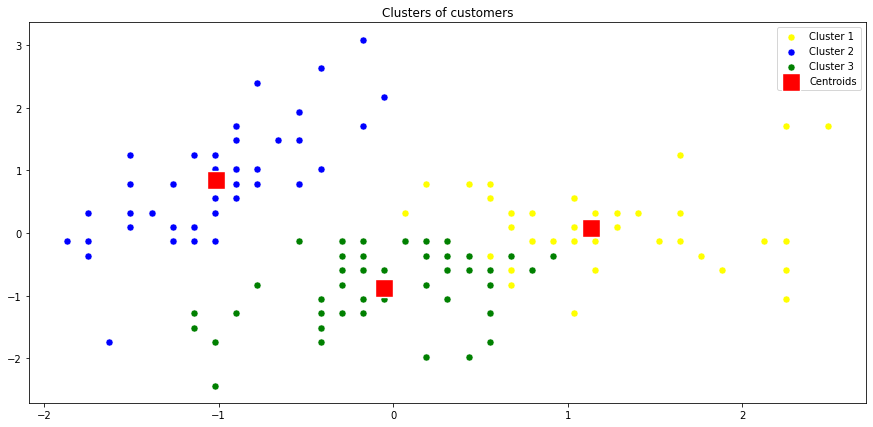

In [32]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.legend()
plt.show()

### Model Evaluation

In [33]:
print("Silhouette Score: ", silhouette_score(X, kmeans.fit_predict(X)))
print("CH Score: ", calinski_harabasz_score(X, kmeans.labels_))
print("DB Score", davies_bouldin_score(X, kmeans.labels_))

Silhouette Score:  0.45994823920518646
CH Score:  241.90440170183172
DB Score 0.8335949464754334


## DBScan

### Finding Epsilon

<Figure size 360x360 with 0 Axes>

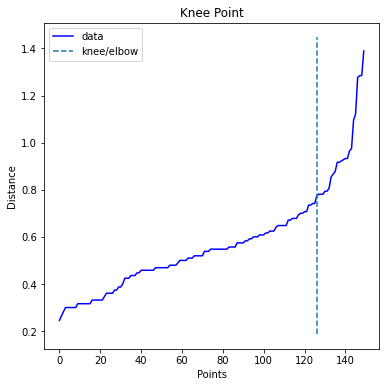

Epsilon:  0.7745966692414834


In [34]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data)

distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
eps = distances[knee.knee]
print("Epsilon: ", eps)

### Model Fitting

In [35]:
min_samples = 13
db = DBSCAN(eps=eps, min_samples=min_samples)
db_fit = db.fit(X)

Silhouette Score:  0.43643250434298203
CH Score:  94.16432555921153
DB Score:  4.778559225164638


### Model Evaluation

In [44]:
print("Silhouette Score: ", silhouette_score(X, db.fit_predict(X)))
print("CH Score: ", calinski_harabasz_score(X, db.labels_))
print("DB Score: ", davies_bouldin_score(X, db.labels_))

Silhouette Score:  0.43643250434298203
CH Score:  94.16432555921153
DB Score:  4.778559225164638


## Agglomerative Clustering

### Dendrogram

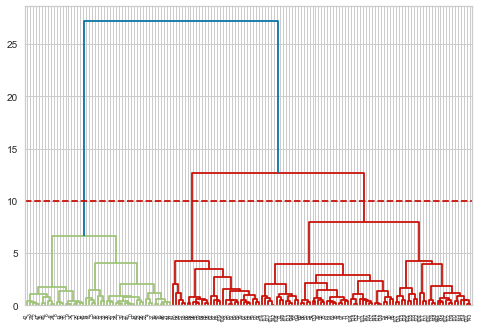

In [10]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward', metric = "euclidean"))
plt.axhline(y=10, color='r', linestyle='--')

### Model Fitting

In [45]:
ac=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3)
ac_fit = ac.fit(X)

AgglomerativeClustering(n_clusters=3)

### Clusters visualisation

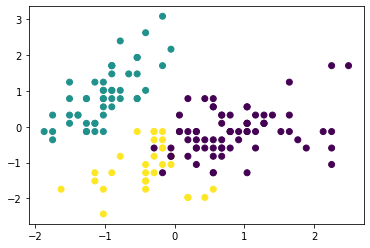

In [46]:
labels = ac.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

### Testing different numbers of clusters

For k =  2 silhouette_score ==  0.5770346019475988
CH Score:  240.24566522437965
DB Score:  0.5916560992933364
___
For k =  3 silhouette_score ==  0.446689041028591
CH Score:  222.7191638221536
DB Score:  0.803466530287675
___
For k =  4 silhouette_score ==  0.40063631598559735
CH Score:  201.2514543140406
DB Score:  0.9788214982592802
___
For k =  5 silhouette_score ==  0.33058726295230545
CH Score:  192.68128271764135
DB Score:  0.9742492313121824
___


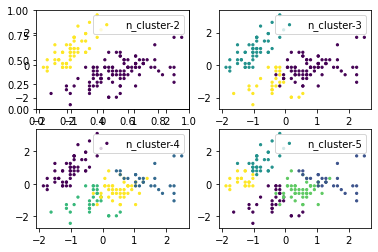

In [49]:
silhouette_scores = []
f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
    ac = AgglomerativeClustering(n_clusters=i)
    ac_fit=ac.fit(X)
    print("For k = ", i, "silhouette_score == ", silhouette_score(X, ac.fit_predict(X)))
    print("CH Score: ", calinski_harabasz_score(X, ac_fit.labels_))
    print("DB Score: ", davies_bouldin_score(X, ac_fit.labels_))
    print("___")
    f.add_subplot(2, 2, i-1)
    plt.scatter(X[:,0], X[:,1], s=5, c=ac_fit.labels_, label="n_cluster-"+str(i))
    plt.legend()
plt.show()

# Conclusion

The classification models all did great thanks to the small dataset.

_____

We know, thanks to the dataset, that there are 3 species, however, our Clustering models find that 2 clusters will give the best scores! 

This goes to show that errors are always possible and that models always need improvements.